# Make a movie of meteorology

# To Do:
1. Fix Titles
3. Add labeled colorbars

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *
import glob
import moviepy.editor as mpy
import math

In [2]:
# Alpine-3D grids
ds = xr.open_dataset("../../nc_storage/pomeroy.nc")

# SNOWPACK topography 
dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

# Trim grids
n_trim = 15
ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))
dem = dem.isel(easting=slice(n_trim, -n_trim))
dem = dem.isel(northing=slice(n_trim, -n_trim))

# Get eastins and northings
x_snowpack = ds['easting']
y_snowpack = ds['northing']

# Settings

In [3]:
# Time slice
n_0 = 2874
n_f = n_0 + 50

# Precipiation

In [4]:
# Wind Speed
A3D_var = ds['pr'][n_0:n_f,:,:].cumsum(dim='time')
colormap = Purples_9.mpl_colormap
title = "Precipitation [mm. w.e.]"

# Get variable max/min
maxima = A3D_var.max()
minima = A3D_var.min()
print("Min = " + str(minima.values))
print("Max = " + str(maxima.values))

Min = 0.04769428
Max = 11.016342


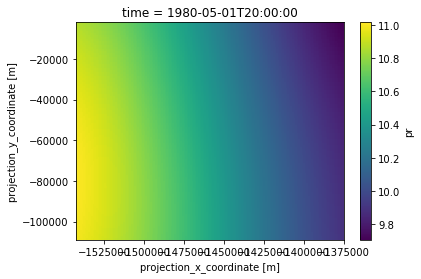

In [5]:
A3D_var[-1,:,:].plot()

In [6]:
# Clear old images, gifs,and movies
!mkdir -p movie_frame
!rm -f precip.mp4
!rm -f movie_frame/*

In [7]:
# Make movie frames

for time_step in range(0, len(A3D_var['time']), 1):
# for time_step in range(0, 1, 1):

    # Plot map of mean wind
    print("Working on time step: " + str(time_step) + " of " + str(len(A3D_var['time'])))
    f = plt.figure(figsize=(30, 15))

    # DEM
    contour_levels = np.linspace(dem.min(), dem.max(), 25)
    contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
    plt.clabel(contour, fontsize=20, fmt = '%.0f', inline=True)
    
    # Meteo variable
    plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var.isel(time=time_step), \
               cmap=colormap, vmin=minima, vmax=maxima)
    plt.title("Precipitation: " + str(A3D_var['time'][time_step].values)[0:19], fontsize=32)
    plt.xlabel("Easting", fontsize=32)
    plt.ylabel("Northing", fontsize=32)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    cb = plt.colorbar()
    cb.set_label("mm w.e.", fontsize=32)
    cb.ax.tick_params(labelsize=32)
    
    #Save Figure with image number zero padding 
    if time_step < 10: # 1 digit
        plt.savefig("movie_frame/frame_000" + str(time_step) + ".png", dpi=100)
    elif time_step < 100 and time_step > 9: # 2 digits
        plt.savefig("movie_frame/frame_00" + str(time_step) + ".png", dpi=100)
    elif time_step < 1000 and time_step > 99: # 3 digits
        plt.savefig("movie_frame/frame_0" + str(time_step) + ".png", dpi=100)
    else: # 4 digits
        plt.savefig("movie_frame/frame_" + str(time_step) + ".png", dpi=100)
    f.clear()
    plt.close(f)
    plt.close()

Working on time step: 0 of 50
Working on time step: 1 of 50
Working on time step: 2 of 50
Working on time step: 3 of 50
Working on time step: 4 of 50
Working on time step: 5 of 50
Working on time step: 6 of 50
Working on time step: 7 of 50
Working on time step: 8 of 50
Working on time step: 9 of 50
Working on time step: 10 of 50
Working on time step: 11 of 50
Working on time step: 12 of 50
Working on time step: 13 of 50
Working on time step: 14 of 50
Working on time step: 15 of 50
Working on time step: 16 of 50
Working on time step: 17 of 50
Working on time step: 18 of 50
Working on time step: 19 of 50
Working on time step: 20 of 50
Working on time step: 21 of 50
Working on time step: 22 of 50
Working on time step: 23 of 50
Working on time step: 24 of 50
Working on time step: 25 of 50
Working on time step: 26 of 50
Working on time step: 27 of 50
Working on time step: 28 of 50
Working on time step: 29 of 50
Working on time step: 30 of 50
Working on time step: 31 of 50
Working on time st

In [8]:
# Make a .mp4 movie and gif
!for ((x=50; x<=60; x++)); { cp movie_frame/frame_0049.png movie_frame/frame_00${x}.png; }
file_list = sorted(glob.glob('movie_frame/*.png'))
clip = mpy.ImageSequenceClip(file_list, fps=5) # Default is 30
clip.write_videofile('precip.mp4')
# clip.write_gif('movie.gif')

Moviepy - Building video precip.mp4.
Moviepy - Writing video precip.mp4



Moviepy - Done !
Moviepy - video ready precip.mp4


# SMB

In [9]:
# Wind Speed
A3D_var = (ds['swe'][n_0:n_f,:,:] - ds['swe'][n_0,:,:]) * 1000
colormap = plt.cm.Blues
title = "Surface Mass Balance [mm. w.e.]"

# Get variable max/min
maxima = np.abs(A3D_var).max()
minima = 0
print("Min = " + str(minima))
print("Max = " + str(maxima.values))

Min = 0
Max = 23.5672


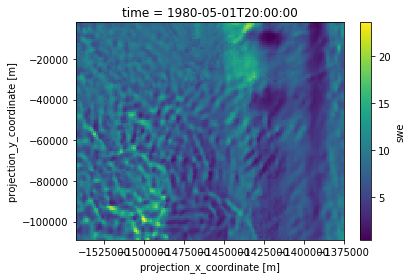

In [10]:
A3D_var[-1,:,:].plot()

In [11]:
# Clear old images, gifs,and movies
!mkdir -p movie_frame
!rm -f movie.gif
!rm -f smb.mp4
!rm -f movie_frame/*

In [12]:
# Make movie frames

for time_step in range(0, len(A3D_var['time']), 1):
# for time_step in range(0, 1, 1):

    # Plot map of mean wind
    print("Working on time step: " + str(time_step) + " of " + str(len(A3D_var['time'])))
    f = plt.figure(figsize=(30, 15))

    # DEM
    contour_levels = np.linspace(dem.min(), dem.max(), 25)
    contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
    plt.clabel(contour, fontsize=20, fmt = '%.0f', inline=True)
    
    # Meteo variable
    plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var.isel(time=time_step), \
               cmap=colormap, vmin=minima, vmax=maxima)
    plt.title("Surface Mass Balance: " + str(A3D_var['time'][time_step].values)[0:19], fontsize=32)
    plt.xlabel("Easting", fontsize=32)
    plt.ylabel("Northing", fontsize=32)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    cb = plt.colorbar()
    cb.set_label("mm w.e.", fontsize=32)
    cb.ax.tick_params(labelsize=32)
    
    #Save Figure with image number zero padding 
    if time_step < 10: # 1 digit
        plt.savefig("movie_frame/frame_000" + str(time_step) + ".png", dpi=100)
    elif time_step < 100 and time_step > 9: # 2 digits
        plt.savefig("movie_frame/frame_00" + str(time_step) + ".png", dpi=100)
    elif time_step < 1000 and time_step > 99: # 3 digits
        plt.savefig("movie_frame/frame_0" + str(time_step) + ".png", dpi=100)
    else: # 4 digits
        plt.savefig("movie_frame/frame_" + str(time_step) + ".png", dpi=100)
    f.clear()
    plt.close(f)
    plt.close()

Working on time step: 0 of 50
Working on time step: 1 of 50
Working on time step: 2 of 50
Working on time step: 3 of 50
Working on time step: 4 of 50
Working on time step: 5 of 50
Working on time step: 6 of 50
Working on time step: 7 of 50
Working on time step: 8 of 50
Working on time step: 9 of 50
Working on time step: 10 of 50
Working on time step: 11 of 50
Working on time step: 12 of 50
Working on time step: 13 of 50
Working on time step: 14 of 50
Working on time step: 15 of 50
Working on time step: 16 of 50
Working on time step: 17 of 50
Working on time step: 18 of 50
Working on time step: 19 of 50
Working on time step: 20 of 50
Working on time step: 21 of 50
Working on time step: 22 of 50
Working on time step: 23 of 50
Working on time step: 24 of 50
Working on time step: 25 of 50
Working on time step: 26 of 50
Working on time step: 27 of 50
Working on time step: 28 of 50
Working on time step: 29 of 50
Working on time step: 30 of 50
Working on time step: 31 of 50
Working on time st

In [13]:
# Make a .mp4 movie and gif
!for ((x=50; x<=60; x++)); { cp movie_frame/frame_0049.png movie_frame/frame_00${x}.png; }
file_list = sorted(glob.glob('movie_frame/*.png'))
clip = mpy.ImageSequenceClip(file_list, fps=5) # Default is 30
clip.write_videofile('smb.mp4')
# clip.write_gif('movie.gif')

Moviepy - Building video smb.mp4.
Moviepy - Writing video smb.mp4



Moviepy - Done !
Moviepy - video ready smb.mp4


# WINDEROSIONDEPOSITION

In [14]:
# Wind Speed
A3D_var = ds['WINDEROSIONDEPOSITION'][n_0:n_f,:,:].cumsum(dim='time')
colormap = plt.cm.RdBu
title = "Deposition and Erosion [mm. w.e.]"

# Get variable max/min
maxima = np.abs(A3D_var).max()
minima = -maxima
print("Min = " + str(minima.values))
print("Max = " + str(maxima.values))

Min = -16.032398
Max = 16.032398


In [15]:
'''
Calculates U and V components of wind from wind speed and direction. 
Wind direction is the meteorological wind direction (i.e. direction the wind is coming from in degrees)
'''
def calc_U_V(speed, direction):
    U = -speed * np.sin(math.pi / 180 * direction)
    V = -speed * np.cos(math.pi / 180 * direction)
    return U, V

# Get U and V components
ws = ds['ws'][n_0:n_f,:,:]
wd = ds['dw'][n_0:n_f,:,:]
U, V = calc_U_V(ws, wd)
VW_max = np.sqrt(U**2 + V**2).max()
VW_min = 0

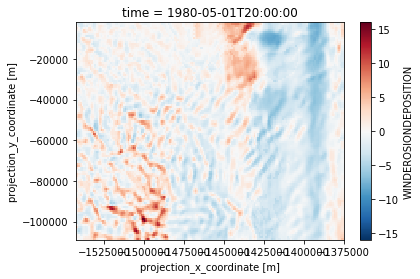

In [16]:
A3D_var[-1,:,:].plot()

In [17]:
# Clear old images, gifs,and movies
!mkdir -p movie_frame
!rm -f movie.gif
!rm -f wind.mp4
!rm -f movie_frame/*

In [18]:
# Make movie frames

for time_step in range(0, len(A3D_var['time']), 1):
# for time_step in range(0, 1, 1):

    # Plot map of mean wind
    print("Working on time step: " + str(time_step) + " of " + str(len(A3D_var['time'])))
    f = plt.figure(figsize=(30, 15))

    # DEM
    contour_levels = np.linspace(dem.min(), dem.max(), 25)
    contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
    plt.clabel(contour, fontsize=20, fmt = '%.0f', inline=True)
    
    # Meteo variable
    plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var.isel(time=time_step), \
               cmap=colormap, vmin=minima, vmax=maxima)
    plt.title("Deposition and Erosion: " + str(A3D_var['time'][time_step].values)[0:19], fontsize=32)
    plt.xlabel("Easting", fontsize=32)
    plt.ylabel("Northing", fontsize=32)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    cb = plt.colorbar()
    cb.set_label("mm w.e.", fontsize=32)
    cb.ax.tick_params(labelsize=32)
    
    # Wind speed and direction
    spacing = 10
    northing_ind = np.arange(0, len(ds['northing']), spacing)
    easting_ind = np.arange(0, len(ds['easting']), spacing)
    plt.quiver(x_snowpack[easting_ind].values, y_snowpack[northing_ind].values, \
               U.isel(time=time_step)[northing_ind, easting_ind], V.isel(time=time_step)[northing_ind, easting_ind], scale=250)
    
    #Save Figure with image number zero padding 
    if time_step < 10: # 1 digit
        plt.savefig("movie_frame/frame_000" + str(time_step) + ".png", dpi=100)
    elif time_step < 100 and time_step > 9: # 2 digits
        plt.savefig("movie_frame/frame_00" + str(time_step) + ".png", dpi=100)
    elif time_step < 1000 and time_step > 99: # 3 digits
        plt.savefig("movie_frame/frame_0" + str(time_step) + ".png", dpi=100)
    else: # 4 digits
        plt.savefig("movie_frame/frame_" + str(time_step) + ".png", dpi=100)
    f.clear()
    plt.close(f)
    plt.close()

Working on time step: 0 of 50
Working on time step: 1 of 50
Working on time step: 2 of 50
Working on time step: 3 of 50
Working on time step: 4 of 50
Working on time step: 5 of 50
Working on time step: 6 of 50
Working on time step: 7 of 50
Working on time step: 8 of 50
Working on time step: 9 of 50
Working on time step: 10 of 50
Working on time step: 11 of 50
Working on time step: 12 of 50
Working on time step: 13 of 50
Working on time step: 14 of 50
Working on time step: 15 of 50
Working on time step: 16 of 50
Working on time step: 17 of 50
Working on time step: 18 of 50
Working on time step: 19 of 50
Working on time step: 20 of 50
Working on time step: 21 of 50
Working on time step: 22 of 50
Working on time step: 23 of 50
Working on time step: 24 of 50
Working on time step: 25 of 50
Working on time step: 26 of 50
Working on time step: 27 of 50
Working on time step: 28 of 50
Working on time step: 29 of 50
Working on time step: 30 of 50
Working on time step: 31 of 50
Working on time st

In [19]:
# Make a .mp4 movie and gif
!for ((x=50; x<=60; x++)); { cp movie_frame/frame_0049.png movie_frame/frame_00${x}.png; }
file_list = sorted(glob.glob('movie_frame/*.png'))
clip = mpy.ImageSequenceClip(file_list, fps=5) # Default is 30
clip.write_videofile('wind.mp4')
# clip.write_gif('movie.gif')

Moviepy - Building video wind.mp4.
Moviepy - Writing video wind.mp4



Moviepy - Done !
Moviepy - video ready wind.mp4
